# CS4487 - Machine Learning
# Lecture 5a - Supervised Learning - Regression
## Dr. Antoni B. Chan
### Dept. of Computer Science, City University of Hong Kong

# Outline
1. Linear Regression
2. Selecting Features
3. Removing Outliers
4. Non-linear regression

In [1]:
# setup
%matplotlib inline
import IPython.core.display         # setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# Regression
- Input observation $x$, typically a vector in $\mathbb{R}^d$.
- Output $y \in \mathbb{R}$, a real number.
- **Goal:** predict output $y$ from input $x$.
  - i.e., learn the function $y = f(x)$.

In [2]:
linbias = 30
[linX, linY, lincoefs] = datasets.make_regression(n_samples=100, n_features=1, 
                                                  n_informative=1, bias=linbias, noise=10.0, 
                                                  coef=True, random_state=4487)
axbox = [-3, 3, -60, 100]
linfig = plt.figure()
plt.plot(linX, linY, 'b.')
plt.xlabel('feature x')
plt.ylabel('output y')
plt.grid(True); plt.axis(axbox)
plt.close()

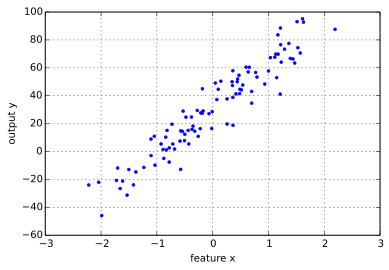

In [3]:
linfig

# Examples: 
- Predict Boston house price from number of rooms, or percentage of low-status households in neighborhood.

In [4]:
boston = datasets.load_boston()

bostonY = boston['target']
bostonX = boston['data'][:,[5,12]]

boston1dfig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(bostonX[:,0], bostonY, 'b.')
plt.grid(True)
plt.ylabel('Home Price ($1000s)')
plt.xlabel('number of rooms')

plt.subplot(1,2,2)
plt.plot(bostonX[:,1], bostonY, 'b.')
plt.grid(True)
plt.ylabel('Home Price ($1000s)')
plt.xlabel('percent of low-status households')
plt.close()

boston2dfig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(bostonX[:,0], bostonX[:,1], c=bostonY)
cbar = plt.colorbar()
cbar.set_label('Home Price ($1000s)')
plt.xlabel('number of rooms')
plt.ylabel('percent of low-status households')
plt.grid(True)
plt.close()

ax = boston2dfig.add_subplot(122, projection='3d')
ax.scatter(bostonX[:,0], bostonX[:,1], c=bostonY)
ax.set_xlabel('number of rooms')
ax.set_ylabel('percent low-status households')
ax.set_zlabel('Home Price ($1000s)')



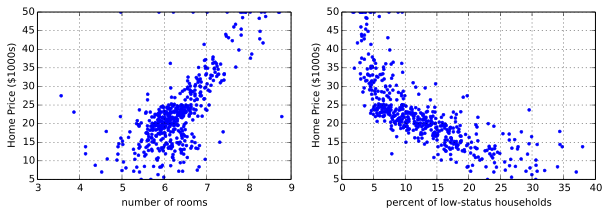

In [5]:
boston1dfig

- predict from both features

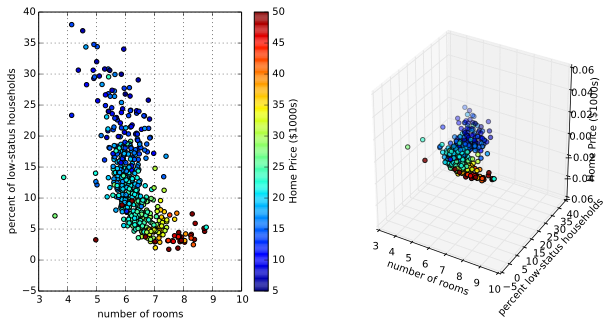

In [6]:
boston2dfig

# Linear Regression 
- **1-d case:** the output $y$ is a linear function of input feature $x$
  - $y = a * x + b $
  - $w$ is the slope, $b$ is the intercept.

In [7]:
linfig = plt.figure()
plt.plot(linX, linY, 'b.')
xr = linspace(axbox[0], axbox[1], 100)
l1,= plt.plot(xr, lincoefs*xr+linbias, 'r-')
plt.xlabel('feature x')
plt.ylabel('output y')
plt.grid(True); plt.axis(axbox)
leg = plt.legend([l1], ['y = %0.4g x + %0.4g' % (lincoefs, linbias)], 'lower right')
leg.get_frame().set_facecolor('white')
plt.close()

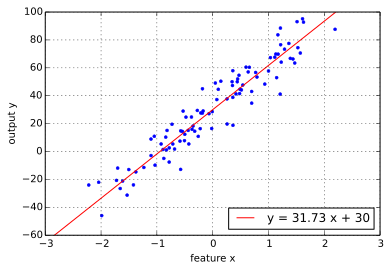

In [8]:
linfig

- **d-dim case**: the output $y$ is a linear combination of $d$ input variables $x_1, \cdots, x_d$:
  - $y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d$
- Equivalently, 
  - $y = w_0 + w^T x = w_0 +\sum_{j=1}^d w_j x_j$
  - $x\in\mathbb{R}^d$ is the vector of input values.
  - $w\in\mathbb{R}^d$ are the weights of the linear function, and $w_0$ is the intercept (bias term).

In [9]:

xr = [linspace(-3,3,100), linspace(-4,4,100)]
xgrid0, xgrid1 = meshgrid(xr[0], xr[1])
allpts = c_[xgrid0.ravel(), xgrid1.ravel()]

w = array([1,2])
b = 20
yout = dot(allpts, w[:,newaxis]) + b
yout = yout.reshape(xgrid0.shape)

lin2dfig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(yout, origin='lower', extent=[-3,3,-4,4], cmap='Blues')
cbar.set_label('y')
cbar = plt.colorbar()
CS = plt.contour(xr[0], xr[1], yout, colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$y=x_1 + 2x_2 + 20$')
ax = lin2dfig.add_subplot(122, projection='3d')
ax.plot_surface(xgrid0, xgrid1, yout, cmap='Blues')
ax.contour(xr[0], xr[1], yout, zdir='z', offset=0, colors='k')
ax.set_zlim(0,35)
ax.set_zlabel('y')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.close()

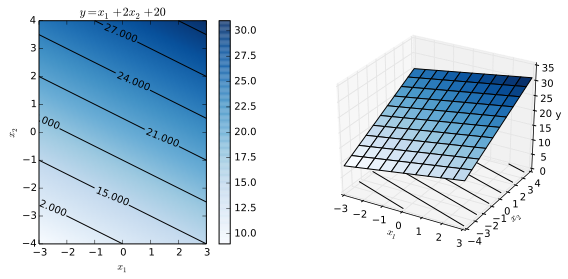

In [10]:
lin2dfig

# Ordinary Least Squares (OLS)
- The linear function has form $f(x) = w^Tx + b$.
- _How to estimate the parameters $(w,b)$ from the data?_
- Fit the parameters by minimizing the squared prediction error on the training set $\{(x_i,y_i)\}_{i=1}^N$:
  $$\min_{w,b} \sum_{i=1}^N (y_i - f(x_i))^2 = \min_{w,b} \sum_{i=1}^N (y_i - (w^Tx_i + b))^2$$
  - closed-form solution.

# Examples: 1-d

w = [ 31.10165239]
b = 30.657718641
MSE = 100.047933015


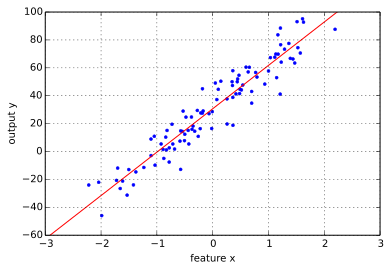

In [11]:
# fit using ordinary least squares
ols = linear_model.LinearRegression()
ols.fit(linX, linY)

print "w =", ols.coef_
print "b =", ols.intercept_

axbox = [-3, 3, -60, 100]
xr = linspace(axbox[0], axbox[1], 100).reshape(100,1)
# prediction for range of x features
ypred = ols.predict(xr)

plt.figure()
plt.plot(linX, linY, 'b.')
plt.plot(xr, ypred, 'r-')
plt.xlabel('feature x')
plt.ylabel('output y')
plt.grid(True); plt.axis(axbox)

# calculate mean-square error on training set
MSE = mean((ols.predict(linX) - linY)**2)
print "MSE =", MSE

# Boston housing price (1d)
- learn regression function for each feature separately

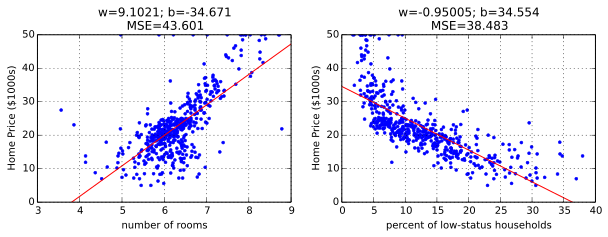

In [12]:
# fit each dimension of Boston data
plt.figure(figsize=(10,3))

bostonFeats = ('number of rooms', 'percent of low-status households')
bostonaxbox = ([3,9,0,50], [0,40,0,50])

for i in range(2):
    ols = linear_model.LinearRegression()
    tmpX = bostonX[:,i][:,newaxis]
    ols.fit(tmpX, bostonY)

    # predict
    xr = linspace(bostonaxbox[i][0], bostonaxbox[i][1], 100)
    ypred = ols.predict(xr[:,newaxis])
    
    # calculate mean-square error on training set
    MSE = mean((ols.predict(tmpX) - bostonY)**2)
    
    plt.subplot(1,2,i+1)
    plt.plot(bostonX[:,i], bostonY, 'b.')
    plt.plot(xr, ypred, 'r-')
    plt.grid(True)
    plt.ylabel('Home Price ($1000s)')
    plt.xlabel(bostonFeats[i])
    plt.axis(bostonaxbox[i])
    plt.title('w=%0.5g; b=%0.5g\nMSE=%0.5g' % (ols.coef_, ols.intercept_, MSE))

- for both features together

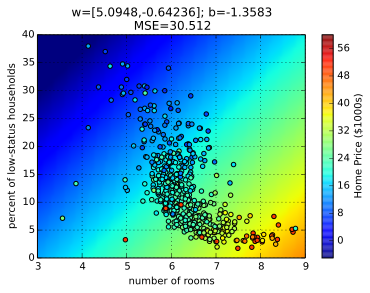

In [13]:
# learn with both dimensions
ols = linear_model.LinearRegression()
ols.fit(bostonX, bostonY)

bostonaxbox2 = bostonaxbox[0][0:2] + bostonaxbox[1][0:2]

# predict 
xr = [linspace(bostonaxbox2[0],bostonaxbox2[1],100), 
      linspace(bostonaxbox2[2],bostonaxbox2[3],100)]
xgrid0, xgrid1 = meshgrid(xr[0], xr[1])
allpts = c_[xgrid0.ravel(), xgrid1.ravel()]

ypred = ols.predict(allpts).reshape(xgrid0.shape)

# calculate MSE
MSE = mean((ols.predict(bostonX) - bostonY)**2)

# make figure
plt.figure()
vmin = bostonY.min()-10
vmax = bostonY.max()+10
# show the 2d function as an image
plt.imshow(ypred, origin='lower', extent=bostonaxbox2, aspect='auto', vmin=vmin, vmax=vmax)
plt.scatter(bostonX[:,0], bostonX[:,1], c=bostonY, vmin=vmin, vmax=vmax)
cbar = plt.colorbar()
cbar.set_label('Home Price ($1000s)')
plt.xlabel('number of rooms')
plt.ylabel('percent of low-status households')
plt.grid(True); plt.axis(bostonaxbox2)
plt.title('w=[%0.5g,%0.5g]; b=%0.5g\nMSE=%0.5g' % (ols.coef_[0], ols.coef_[1], ols.intercept_, MSE))

- interpretation from the linear model parameters:
  - each room increases home price by \$5095 ($w_1$)
  - each percentage of low-status decreases home price by \$642 ($w_2$)

# Selecting Features
- The Boston housing data actually has 13 features.

In [14]:
bostonY = boston['target']
bostonX = boston['data']

bostonffig = plt.figure(figsize=(10,5))
for i in range(bostonX.shape[1]):
    plt.subplot(3,5,i+1)
    plt.plot(bostonX[:,i], bostonY, 'b.')
    plt.grid(True)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
plt.close()

bostonAttr = [
        'CRIM     per capita crime rate by town', 
        'ZN       proportion of residential land zoned for lots over 25,000 sq.ft.', 
        'INDUS    proportion of non-retail business acres per town', 
        'CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)', 
        'NOX      nitric oxides concentration (parts per 10 million)', 
        'RM       average number of rooms per dwelling', 
        'AGE      proportion of owner-occupied units built prior to 1940', 
        'DIS      weighted distances to five Boston employment centres', 
        'RAD      index of accessibility to radial highways', 
        'TAX      full-value property-tax rate per $10,000', 
        'PTRATIO  pupil-teacher ratio by town', 
        'B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town', 
        'LSTAT    % lower status of the population'
    ]

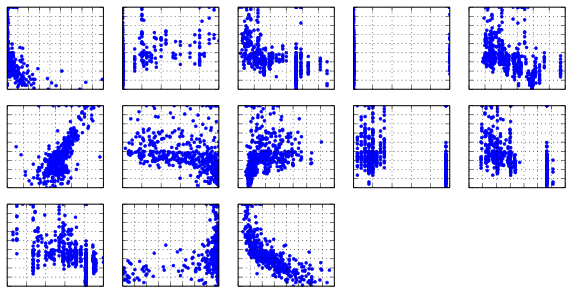

In [15]:
bostonffig

- _Can select a few features that are good for predicting the price?_
  - This will provide some insight about our data and what is important.

# Shrinkage
- Add a _regularization_ term to "shrink" some linear weights to zero.
  - features associated with zero weight are not important since they aren't used to calculate the function output.
  - $y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d$


# Ridge Regression
- Add regularization term to OLS:
$$\min_{w,b} \alpha ||w||^2 + \sum_{i=1}^N (y_i - f(x_i))^2 $$
- the first term is the _regularization term_
  - $\alpha$ is the hyperparameter that controls the amount of shrinkage
  - $||w||^2 = \sum_{j=1}^d w_j^2$ penalizes large weights.
- the second term is the _data-fit term_
  - sum-squared error of the prediction.
- Also has a closed-form solution.
  - (The term "ridge regression" comes from the closed-form solution, where a "ridge" is added to the diagonal of the covariance matrix)

# Example on Boston data
- vary $\alpha$ from $10^{-3}$ (little shrinkage) to $10^6$ (lots of shrinkage)
  - for small $\alpha$, all weights are non-zero.
  - for large $\alpha$, all weights shrink to 0.
  - somewhere in between is the best model...

In [16]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  cross_validation.train_test_split(boston['data'], boston['target'], 
  train_size=0.8, test_size=0.2, random_state=4487)

# normalize feature values
# this makes comparing weights more meaningful
scaler = preprocessing.StandardScaler()  
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)
    
print trainXn.shape
print testXn.shape

(404, 13)
(102, 13)


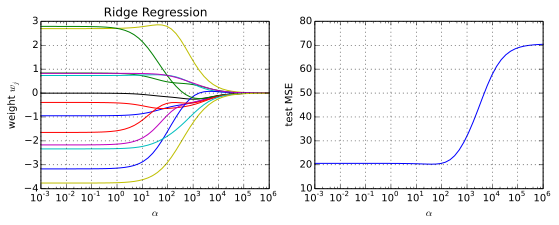

In [17]:
# alpha values to try
alphas = logspace(-3,6,50)

MSEs = empty(len(alphas))
ws   = empty((len(alphas), trainXn.shape[1]))
for i,alpha in enumerate(alphas):
    # learn the RR model
    rr = linear_model.Ridge(alpha=alpha)
    rr.fit(trainXn, trainY)
    ws[i,:] = rr.coef_   # save weights
    
    MSEs[i] = mean((rr.predict(testXn) - testY)**2)

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.semilogx(alphas, ws)
plt.xlabel('$\\alpha$'); plt.ylabel('weight $w_j$')
plt.grid(True)
plt.title("Ridge Regression")
plt.subplot(1,2,2)
plt.semilogx(alphas, MSEs)
plt.xlabel('$\\alpha$'); plt.ylabel('test MSE')
plt.axis([10**-3, 10**6, 10, 80])
plt.grid(True)

# Selecting $\alpha$ using cross-validation

In [18]:
# train RR with cross-validation
rr = linear_model.RidgeCV(alphas=alphas, cv=5)
rr.fit(trainXn, trainY)

MSE = mean((rr.predict(testXn) - testY)**2)
print "MSE =", MSE
print "alpha =", rr.alpha_
print "w =", rr.coef_

MSE = 20.427112422
alpha = 10.9854114199
w = [-0.85419239  0.71385132 -0.53970282  0.75571123 -1.85577534  2.78267491
 -0.06063119 -2.8538377   2.10475562 -1.0968367  -2.22304827  0.81576653
 -3.61306393]


In [19]:
# sort coefficients from smallest to largest, then reverse it
inds = argsort(abs(rr.coef_))[::-1]
# print out
print "weight : feature description"
for i in inds:
    print "% 0.3f : %s" % (rr.coef_[i], bostonAttr[i])

weight : feature description
-3.613 : LSTAT    % lower status of the population
-2.854 : DIS      weighted distances to five Boston employment centres
 2.783 : RM       average number of rooms per dwelling
-2.223 : PTRATIO  pupil-teacher ratio by town
 2.105 : RAD      index of accessibility to radial highways
-1.856 : NOX      nitric oxides concentration (parts per 10 million)
-1.097 : TAX      full-value property-tax rate per $10,000
-0.854 : CRIM     per capita crime rate by town
 0.816 : B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 0.756 : CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 0.714 : ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
-0.540 : INDUS    proportion of non-retail business acres per town
-0.061 : AGE      proportion of owner-occupied units built prior to 1940


# Better shrinkage
- With ridge regression, some weights are small but still non-zero.
  - these are less important, but somehow still necessary.
- To get better shrinkage to zero, we can change the regularization term to encourage more weights to be 0. 

# LASSO
- LASSO = "Least absolute shrinkage and selection operator"
- keep the same data fit term, but change the regularization term to the sum of absolute weight values.
  - $\sum_{j=1}^d|w_j|$
  - when a weight is close to 0, the regularization term will force it to be equal to 0.
$$\min_{w,b} \alpha \sum_{j=1}^d|w_j| + \sum_{i=1}^N (y_i - f(x_i))^2 $$


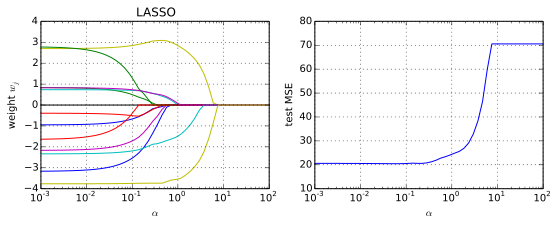

In [20]:
lasalphas = logspace(-3,2,50)

lassoMSEs  = empty(len(alphas))
lassows   = empty((len(alphas), trainXn.shape[1]))
for i,alpha in enumerate(lasalphas):
    # learn the LASSO model
    las = linear_model.Lasso(alpha=alpha)
    las.fit(trainXn, trainY)
    lassows[i,:] = las.coef_   # save weights
    
    lassoMSEs[i] = mean((las.predict(testXn) - testY)**2)

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.semilogx(lasalphas, lassows)
plt.xlabel('$\\alpha$'); plt.ylabel('weight $w_j$')
plt.grid(True)
plt.title('LASSO')
plt.subplot(1,2,2)
plt.semilogx(lasalphas, lassoMSEs)
plt.xlabel('$\\alpha$'); plt.ylabel('test MSE')
plt.axis([10**-3, 10**2, 10, 80])
plt.grid(True)

# Cross-validation to select $\alpha$
- weights for unimportant features are set to 0

In [21]:
# fit with cross-validation (alpha range is determined automatically)
las = linear_model.LassoCV()
las.fit(trainXn, trainY)

MSE = mean((las.predict(testXn) - testY)**2)
print "MSE =", MSE
print "alpha =", las.alpha_
print "w =", las.coef_

MSE = 20.5730760532
alpha = 0.00686652579438
w = [-0.93072851  0.8144078  -0.39980611  0.73120286 -2.1383923   2.70456431
 -0.         -3.12587305  2.68508642 -1.5614193  -2.32482345  0.81823908
 -3.76347777]


In [22]:
# sort coefficients from smallest to largest, then reverse it
inds = argsort(abs(las.coef_))[::-1]
# print out
print "weight : feature description"
for i in inds:
    print "% 0.3f : %s" % (las.coef_[i], bostonAttr[i])

weight : feature description
-3.763 : LSTAT    % lower status of the population
-3.126 : DIS      weighted distances to five Boston employment centres
 2.705 : RM       average number of rooms per dwelling
 2.685 : RAD      index of accessibility to radial highways
-2.325 : PTRATIO  pupil-teacher ratio by town
-2.138 : NOX      nitric oxides concentration (parts per 10 million)
-1.561 : TAX      full-value property-tax rate per $10,000
-0.931 : CRIM     per capita crime rate by town
 0.818 : B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 0.814 : ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 0.731 : CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
-0.400 : INDUS    proportion of non-retail business acres per town
-0.000 : AGE      proportion of owner-occupied units built prior to 1940
